In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

Data source can be used with the proper license from the following website: www.kaggle.com/c/titanic

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
print(f'Train data shape: {train_df.shape}')
print(f'Test data shape: {test_df.shape}')

Train data shape: (891, 12)
Test data shape: (418, 11)


In [4]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



It seems that the training set is missing values in the Cabin column, the Age column, and the Embarked column.


In [5]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Mean values will be used for the missing values in the Age column

In [6]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

Mode values will be used for the missing values in the Embarked column

In [7]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [8]:
train_df['PassengerId'].duplicated().value_counts() # No duplicates are found in the PassengerId column

False    891
Name: PassengerId, dtype: int64

In [9]:
train_df[:891].corrwith(train_df['Survived']).sort_values(ascending=False).head(10)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Pclass        -0.338481
dtype: float64

In [10]:
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df['Embarked'] = train_df['Embarked'].map( {'S': 2, 'C': 1, 'Q': 0} ).astype(int)


In [11]:
train_df['Embarked'].value_counts()

2    646
1    168
0     77
Name: Embarked, dtype: int64

<AxesSubplot:>

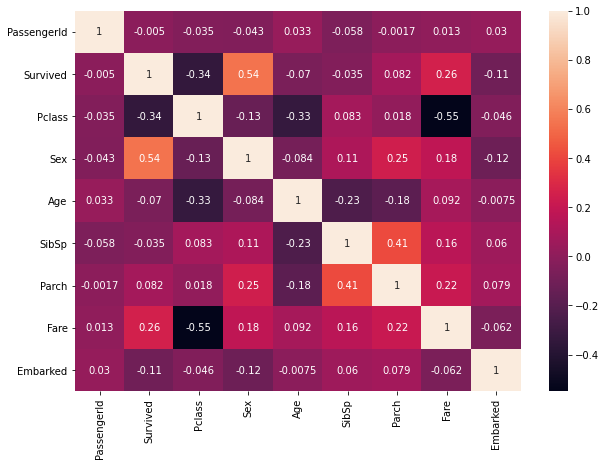

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(train_df.corr(),annot=True)

In [13]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2


In [14]:
X = train_df.drop(columns=['PassengerId','Survived', 'Name', 'Ticket', 'Cabin'])
y = train_df['Survived']


In [15]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()   #(**rfc_params)
rf.fit(X_train, y_train)

rfpred = rf.predict(X_test)

rfscore = accuracy_score(y_test , rfpred)
print('Accuracy Score = ' , rfscore)

Accuracy Score =  0.8026905829596412


In [17]:
svc3 = SVC(kernel='poly' , degree=3)
svc3.fit(X_train , y_train)

pred3 = svc3.predict(X_test)

score3 = accuracy_score(y_test , pred3)

print('Accuracy Score = ' , score3)


Accuracy Score =  0.6278026905829597


Training accuracy 0.9476
Testing accuracy 0.8206


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

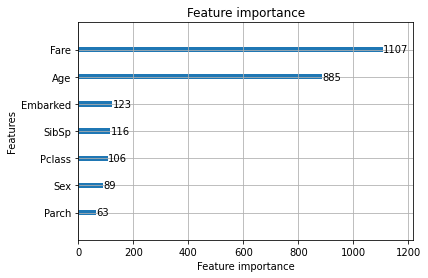

In [18]:
from lightgbm import LGBMClassifier
import lightgbm as lgb

lgbm_model = LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgbm_model.fit(X_train, y_train)
print('Training accuracy {:.4f}'.format(lgbm_model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(lgbm_model.score(X_test,y_test)))
lgb.plot_importance(lgbm_model)

In [19]:
lgb.plot_metric(lgbm_model)

TypeError: object of type 'NoneType' has no len()

<AxesSubplot:>

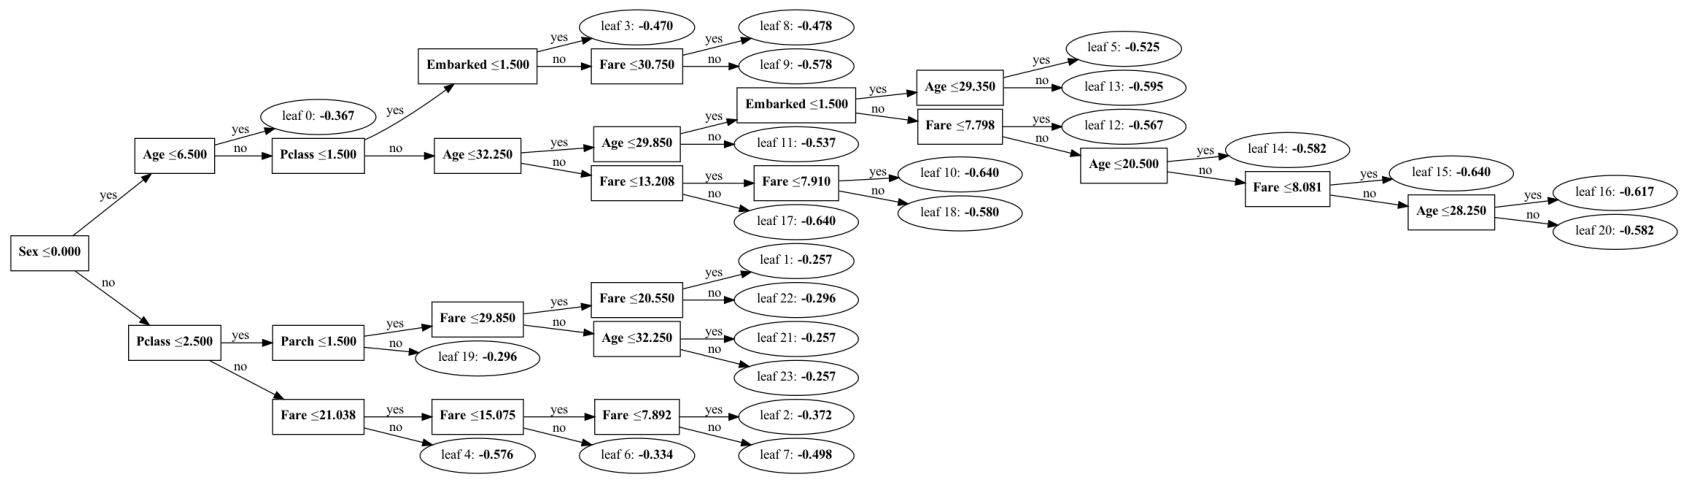

In [21]:
lgb.plot_tree(lgbm_model,figsize=(30,40))